In [1]:
import Peptide_Chef as Chef
import math
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
# from Peptide_Chef import Cook_Book

In [2]:
print('The numpy version is {}.'.format(np.__version__))
print('The pandas version is {}.'.format(pd.__version__))
print('The matplotlib version is {}.'.format(matplotlib.__version__))
print('The seaborn version is {}.'.format(sns.__version__))

The numpy version is 1.19.1.
The pandas version is 1.0.5.
The matplotlib version is 3.2.2.
The seaborn version is 0.11.0.


# In silico Digestion 

In [3]:
# use labelling format (below) to keep track of dfs.
##(*_dig= Digestion of Given Enzyme/Missed/Length/Charge)

In [4]:
url="https://ftp.uniprot.org/pub/databases/uniprot/current_release/knowledgebase/reference_proteomes/Eukaryota/UP000005640/UP000005640_9606.fasta.gz"

In [5]:
Menu=Chef.CookBook(homebrew=False, takeout=True,url=url,measure=True, target="Peptide")

Unzipping...
Takeout is Done!
Here ya go boss!


In [6]:
Menu.head()

,Peptide,UniprotID,Gene,Identification,Protein_Length
0,MGCCGCGSCGGCGGGCGGCGGGCGGGCGGGCGSCTTCRCYRVGCCS...,A0A286YF01,SCGR7,HUMAN Small cysteine and glycine repeat-contai...,96
1,MRAKPQSPLPRNPVPAWSPPTTTTDPMLEKDAAGGDFPANLVLQLM...,A1L1A6,IGS23,HUMAN Immunoglobulin superfamily member 23 OS=...,192
2,MVLLAGTRPQGGEARCMIPPPPSPLLGAQVEEDRTEFKEFQDFSSL...,A6NHS1,YK042,HUMAN Putative uncharacterized protein ENSP000...,94
3,MRLCLIPWNTTPHRVLPPVVWSAPSRKKPVLSARNSMMFGHLSPVR...,A6NL46,YF016,HUMAN Putative UPF0607 protein ENSP00000332738...,340
4,MRLCLIPQNTGTPQRVLPPVVWSPPSRKKPMLSACNSMMFGHLSPV...,A8MUI8,YA034,HUMAN Putative UPF0607 protein ENSP00000383783...,341


In [7]:
Chef.rules

{'arg-c': 'R',
 'asp-n': '\\w(?=D)',
 'bnps-skatole': 'W',
 'caspase 1': '(?<=[FWYL]\\w[HAT])D(?=[^PEDQKR])',
 'caspase 2': '(?<=DVA)D(?=[^PEDQKR])',
 'caspase 3': '(?<=DMQ)D(?=[^PEDQKR])',
 'caspase 4': '(?<=LEV)D(?=[^PEDQKR])',
 'caspase 5': '(?<=[LW]EH)D',
 'caspase 6': '(?<=VE[HI])D(?=[^PEDQKR])',
 'caspase 7': '(?<=DEV)D(?=[^PEDQKR])',
 'caspase 8': '(?<=[IL]ET)D(?=[^PEDQKR])',
 'caspase 9': '(?<=LEH)D',
 'caspase 10': '(?<=IEA)D',
 'chymotrypsin high specificity': '([FY](?=[^P]))|(W(?=[^MP]))',
 'chymotrypsin low specificity': '([FLY](?=[^P]))|(W(?=[^MP]))|(M(?=[^PY]))|(H(?=[^DMPW]))',
 'clostripain': 'R',
 'cnbr': 'M',
 'enterokinase': '(?<=[DE]{3})K',
 'factor xa': '(?<=[AFGILTVM][DE]G)R',
 'formic acid': 'D',
 'glutamyl endopeptidase': 'E',
 'granzyme b': '(?<=IEP)D',
 'hydroxylamine': 'N(?=G)',
 'iodosobenzoic acid': 'W',
 'lysc': 'K',
 'ntcb': '\\w(?=C)',
 'pepsin ph1.3': '((?<=[^HKR][^P])[^R](?=[FL][^P]))|((?<=[^HKR][^P])[FL](?=\\w[^P]))',
 'pepsin ph2.0': '((?<=[^HKR][^P])

## Trypsin in Silco Digestion

In [8]:
# Trypsin in Silco Digestion
missed_sites=[0,1,2,3]
enzyme="trypsin"
Tryp_Peptides=[]
for site in missed_sites:
    x=f"Tryp_{site}_dig"
    z=Chef.ButcherShop(Menu,target="Peptide",identifier="Gene", rule=enzyme,missed=site,exception=None,min_length=7,max_length=100)
    globals()[str(x)]=Chef.Deli(z,meat_package=True)
    Tryp_Peptides.append(globals()[str(x)])
    

You order is being processed and the butcher is preparing your trypsin-cut protein(s)!
The butcher is working...
Preparing your order...
Order is up! You have acquired 562353 peptides that are between 7 and 100 amino acids!
You order is being processed and the butcher is preparing your trypsin-cut protein(s)!
The butcher is working...
Preparing your order...
Order is up! You have acquired 1551626 peptides that are between 7 and 100 amino acids!
You order is being processed and the butcher is preparing your trypsin-cut protein(s)!
The butcher is working...
Preparing your order...
Order is up! You have acquired 2682637 peptides that are between 7 and 100 amino acids!
You order is being processed and the butcher is preparing your trypsin-cut protein(s)!
The butcher is working...
Preparing your order...
Order is up! You have acquired 3825623 peptides that are between 7 and 100 amino acids!


In [9]:
Tryp_0_dig.head()

,gene,aa_comp,peptide,Length,z,Mass,m/z,counts
0,SCGR7,"{'M': 1, 'G': 20, 'C': 12, 'S': 2, 'T': 2, 'R'...",MGCCGCGSCGGCGGGCGGCGGGCGGGCGGGCGSCTTCR,38,2,3039,1519.5,4
1,SCGR7,"{'V': 1, 'G': 1, 'C': 6, 'S': 2, 'P': 1, 'R': 1}",VGCCSSCCPCCR,12,2,1201,600.5,4
2,SCGR7,"{'G': 3, 'C': 7, 'S': 1, 'T': 1, 'P': 1, 'V': ...",GCCGGCCSTPVICCCR,16,2,1545,772.5,4
3,SCGR7,"{'T': 1, 'C': 4, 'G': 4, 'S': 1, 'K': 1}",TCGSCGCGCGK,11,2,956,478.0,4
4,IGS23,"{'A': 1, 'K': 1, 'P': 3, 'Q': 1, 'S': 1, 'L': ...",AKPQSPLPR,9,3,975,325.0,7


In [10]:
len(Tryp_Peptides)

4

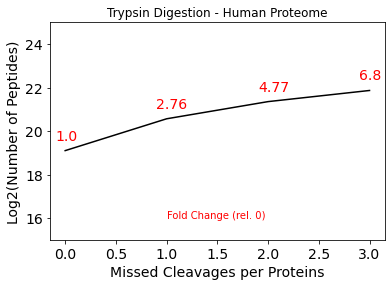

In [11]:
T_Pep_Counts=[]
#Count are in Log10
for df in Tryp_Peptides:
    log = math.log2(len(df))
    T_Pep_Counts.append(log)
plt.plot(missed_sites,T_Pep_Counts,color="black")
plt.title('Trypsin Digestion - Human Proteome')
plt.xlabel('Missed Cleavages per Proteins', fontsize=14)
plt.ylabel('Log2(Number of Peptides)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim([15, 25])
Ratios=[]
for count in T_Pep_Counts:
    ratio=2**(count-T_Pep_Counts[0])
    ratiox=float(round(ratio,2))
    Ratios.append(ratiox)
for x_, y_, name in zip(missed_sites,T_Pep_Counts, Ratios):
    plt.text(x_-0.1,y_ + 0.5, name , fontsize=14, color="red")
plt.text(1,16,"Fold Change (rel. 0)",color="red")
plt.show()

The number of proteins with > 1 peptides : 20445.0
Ratio of Proteins with > 1 Peptides Identified: 99.378
The number of proteins with > 1 peptides : 20573.0
Ratio of Proteins with > 1 Peptides Identified: 99.922
The number of proteins with > 1 peptides : 20576.0
Ratio of Proteins with > 1 Peptides Identified: 99.937
The number of proteins with > 1 peptides : 20577.0
Ratio of Proteins with > 1 Peptides Identified: 99.937


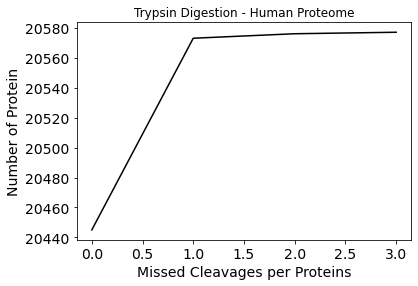

In [12]:
T_Pro_Counts=[]
#Count are in Log10
for df in Tryp_Peptides:
    x,y,z=Chef.Wishbone(df,"gene",1)
    T_Pro_Counts.append(y)
plt.plot(missed_sites,T_Pro_Counts,color="black")
plt.title('Trypsin Digestion - Human Proteome')
plt.xlabel('Missed Cleavages per Proteins', fontsize=14)
plt.ylabel('Number of Protein', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [15]:
import re
def Pep2Pro(protein,peptides):
    protein = re.sub(r'[^A-Z]', '', protein)
    mask = np.zeros(len(protein), dtype=np.int8)
    for peptide in peptides:
        indices = [m.start() for m in re.finditer(
            '(?={})'.format(re.sub(r'[^A-Z]', '', peptide)), protein)]
        for i in indices:
            mask[i:i + len(peptide)] = 1
    return mask.sum(dtype=float) / mask.size

In [16]:
raw=Menu[["Peptide", "Gene"]].set_index("Gene").to_dict()["Peptide"]
cov_df=pd.DataFrame()
i=0
columns=["Tryp_0","Tryp_1","Tryp_2","Tryp_3",]
for df in Tryp_Peptides:
    name=f"SC_{columns[i]}" 
    x_list=list()
    max_len=len(df)
    for gene, protein in raw.items():
        temp=df.loc[df.gene == gene]["peptide"]
        temp2=list(temp)
        x=Pep2Pro(protein,temp2)
        x_list.append(x)
    cov_df[name]= np.array(x_list)
    i+=1
    print("On to the next...")
print("Done")

On to the next...
On to the next...
On to the next...
On to the next...
Done


In [28]:
cov_df.replace(0, np.nan, inplace=True)

In [33]:
Tryp_Silico_Coverage=cov_df.copy()

In [34]:
Tryp_Silico_Coverage.to_excel('Silico_Trypsin_Coverage.xlsx')

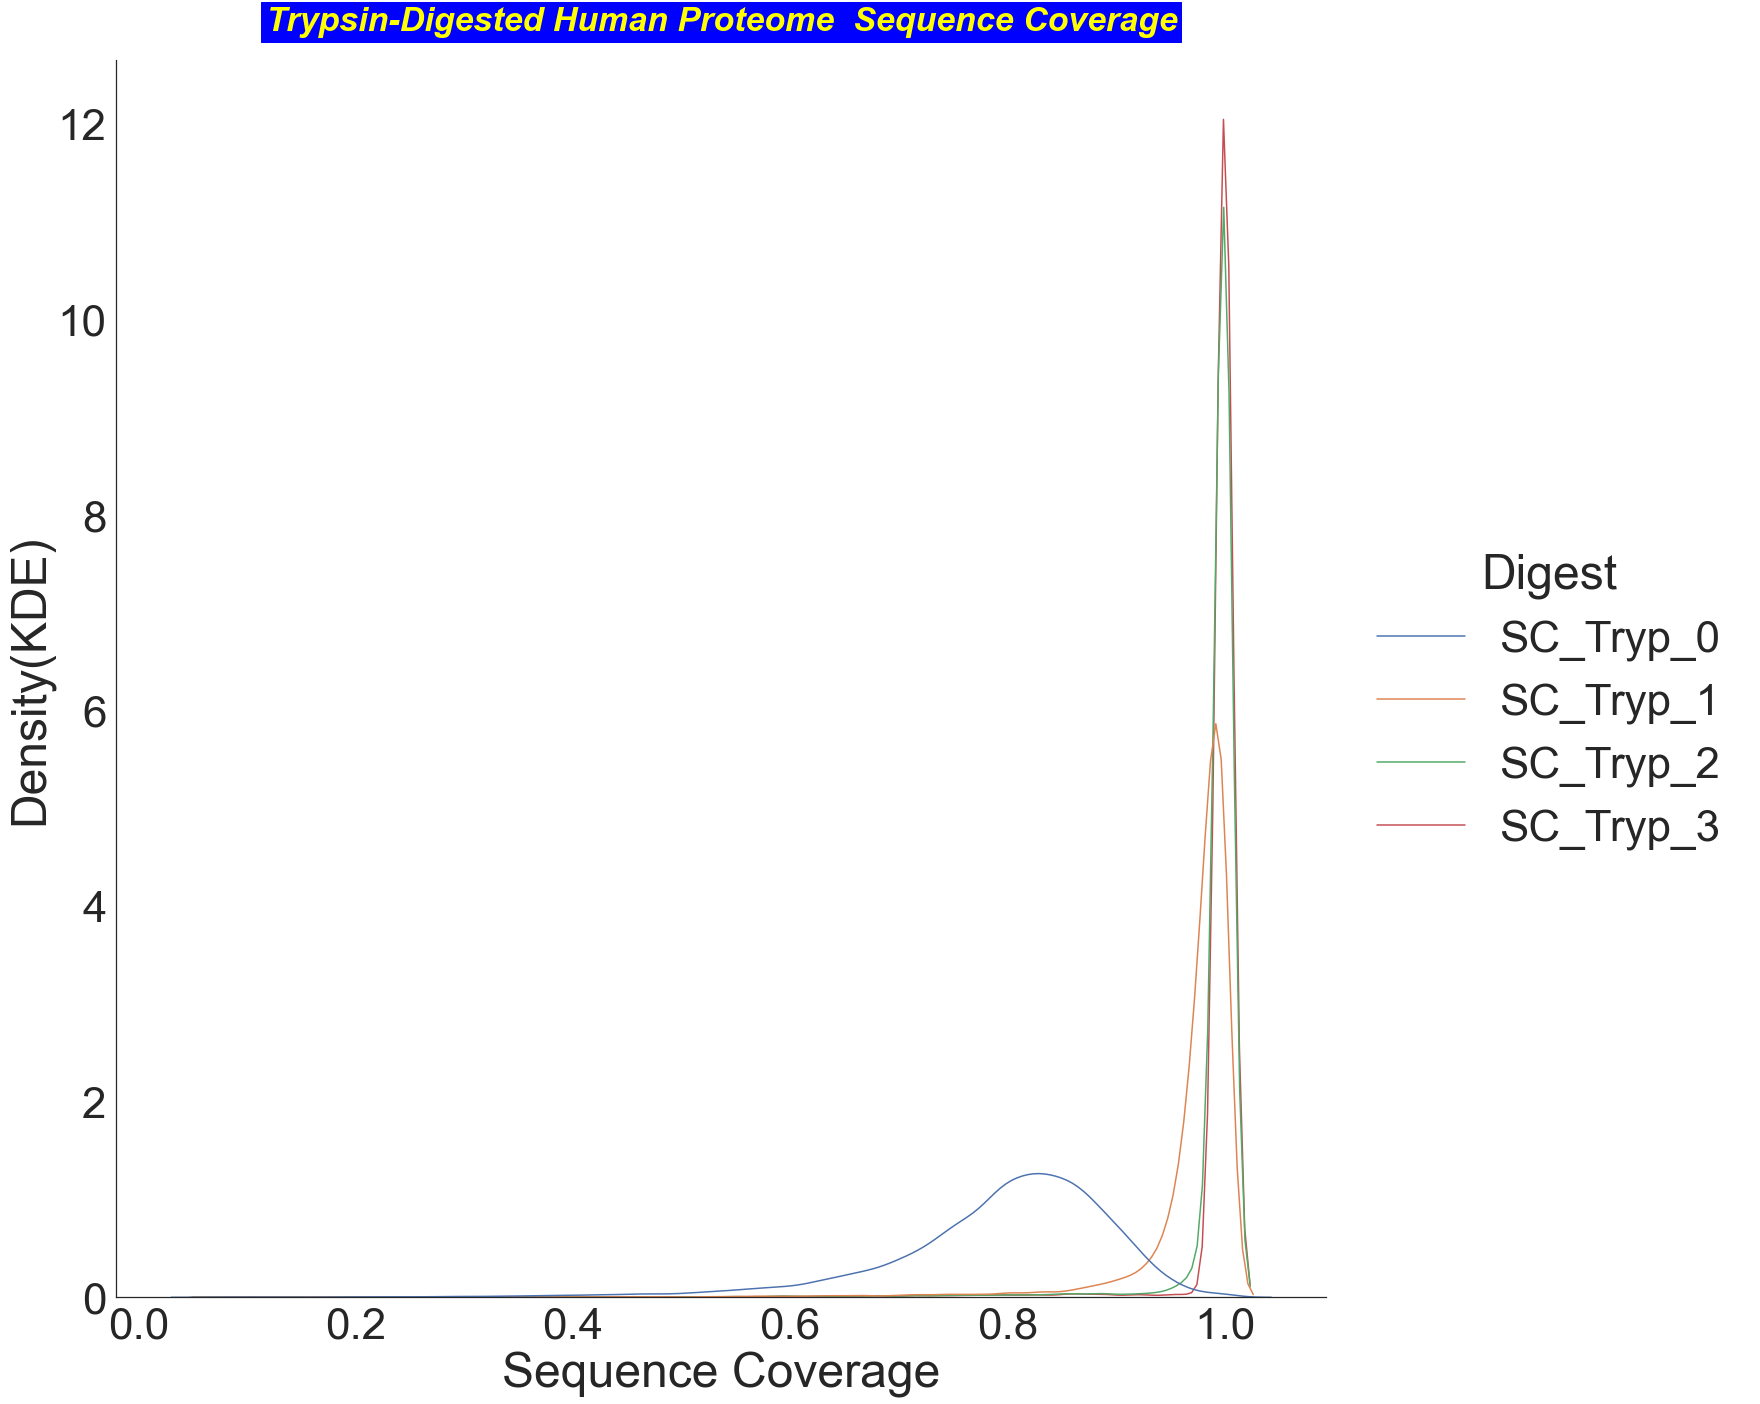

In [35]:
df1 = cov_df.stack().reset_index()
df1.columns = ['Null','Digest','Coverage']
df1.drop(['Null'], axis=1, inplace=True)
sns.set(font_scale = 4)
sns.set_style("white")

g=sns.displot(
    data=df1,
    x="Coverage",hue="Digest",
    kind="kde", height=20,log_scale=(0,0),
    
)
plt.xlabel('Sequence Coverage', fontsize=48)
plt.ylabel('Density(KDE)', fontsize=48)
plt.title('Trypsin-Digested Human Proteome  Sequence Coverage',fontname='Arial',fontweight='bold',fontsize=34,pad=30,backgroundcolor='blue',color='yellow',style='oblique');

In [ ]:
stop

## AspN in Silco Digestion

In [50]:
# AspN in Silco Digestion
missed_sites=[0,1,2,3]
enzyme="asp-n"
AspN_Peptides=[]
for site in missed_sites:
    xx=f"AspN_{site}_dig"
    z=Chef.ButcherShop(Menu,target="Peptide",identifier="Gene", rule='asp-n',missed=site,exception=None,min_length=7,max_length=100)
    globals()[str(xx)]=Chef.Deli(z,meat_package=True)
    AspN_Peptides.append(globals()[str(xx)])
    

You order is being processed and the butcher is preparing your asp-n-cut protein(s)!
The butcher is working...
Preparing your order...
Order is up! You have acquired 345947 peptides that are between 7 and 100 amino acids!
You order is being processed and the butcher is preparing your asp-n-cut protein(s)!
The butcher is working...
Preparing your order...
Order is up! You have acquired 794346 peptides that are between 7 and 100 amino acids!
You order is being processed and the butcher is preparing your asp-n-cut protein(s)!
The butcher is working...
Preparing your order...
Order is up! You have acquired 1222360 peptides that are between 7 and 100 amino acids!
You order is being processed and the butcher is preparing your asp-n-cut protein(s)!
The butcher is working...
Preparing your order...
Order is up! You have acquired 1586639 peptides that are between 7 and 100 amino acids!


In [51]:
AspN_1_dig.head()

,aa_comp,peptide,Length,z,Mass,m/z,counts
0,"{'M': 1, 'G': 30, 'C': 37, 'S': 6, 'T': 4, 'R'...",MGCCGCGSCGGCGGGCGGCGGGCGGGCGGGCGSCTTCRCYRVGCCS...,96,9,8928,992.0,1
1,"{'M': 1, 'R': 2, 'A': 2, 'K': 1, 'P': 7, 'Q': ...",MRAKPQSPLPRNPVPAWSPPTTTT,24,4,2612,653.0,9
2,"{'M': 2, 'R': 2, 'A': 2, 'K': 2, 'P': 8, 'Q': ...",MRAKPQSPLPRNPVPAWSPPTTTTDPMLEK,30,5,3324,664.8,9
3,"{'D': 2, 'P': 1, 'M': 1, 'L': 1, 'E': 1, 'K': ...",DPMLEKDAAGG,11,2,1083,541.5,9
4,"{'D': 2, 'A': 5, 'G': 3, 'F': 2, 'P': 3, 'N': ...",DAAGGDFPANLVLQLMPLKTFPAAIRGVIQSELNYSVILQWVVTM,45,3,4869,1623.0,9


In [52]:
len(AspN_Peptides)

4

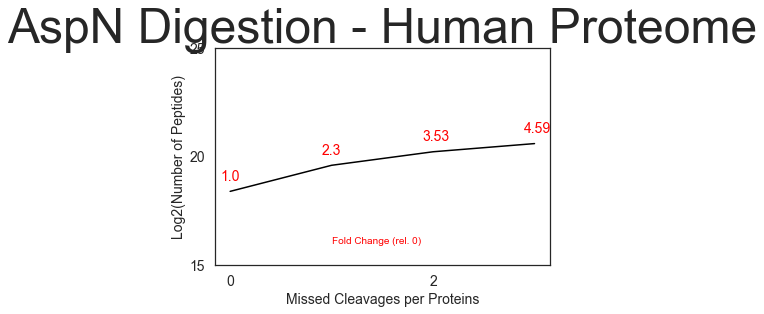

In [53]:
A_Pep_Counts=[]
#Count are in Log10
for df in AspN_Peptides:
    log = math.log2(len(df))
    A_Pep_Counts.append(log)
plt.plot(missed_sites,A_Pep_Counts,color="black")
plt.title('AspN Digestion - Human Proteome')
plt.xlabel('Missed Cleavages per Proteins', fontsize=14)
plt.ylabel('Log2(Number of Peptides)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim([15, 25])
Ratios=[]
for count in A_Pep_Counts:
    ratio=2**(count-A_Pep_Counts[0])
    ratiox=float(round(ratio,2))
    Ratios.append(ratiox)
for x_, y_, name in zip(missed_sites,A_Pep_Counts, Ratios):
    plt.text(x_-0.1,y_ + 0.5, name , fontsize=14, color="red")
plt.text(1,16,"Fold Change (rel. 0)",color="red", fontsize=10)
plt.show()

In [54]:
A_Pro_Counts=[]
#Count are in Log10
for df in AspN_Peptides:
    x,y,z=Chef.Wishbone(df,"gene",1)
    A_Pro_Counts.append(y)
plt.plot(missed_sites,A_Pro_Counts,color="black")
plt.title('Asp-N Digestion - Human Proteome')
plt.xlabel('Missed Cleavages per Proteins', fontsize=14)
plt.ylabel('Number of Protein', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

KeyError: 'gene'

In [ ]:
raw=Menu[["Peptide", "Gene"]].set_index("Gene").to_dict()["Peptide"]
AspN_Silico_Coverage=pd.DataFrame()
i=0
columns=["AspN_0","AspN_1","AspN_2","AspN_3",]
for df in AspN_Peptides:
    name=f"SC_{columns[i]}" 
    x_list=list()
    max_len=len(df)
    for gene, protein in raw.items():
        temp=df.loc[df.gene == gene]["peptide"]
        temp2=list(temp)
        x=Pep2Pro(protein,temp2)
        x_list.append(x)
    cov_df[name]= np.array(x_list)
    i+=1
    print("On to the next...")
print("Done")

In [ ]:
AspN_Silico_Coverage.replace(0, np.nan, inplace=True)

In [ ]:
AspN_Silico_Coverage.to_excel('Silico_AspN_Coverage.xlsx')

In [ ]:
df1 = AspN_Silico_Coverage.stack().reset_index()
df1.columns = ['Null','Digest','Coverage']
df1.drop(['Null'], axis=1, inplace=True)
sns.set(font_scale = 4)
sns.set_style("white")

g=sns.displot(
    data=df1,
    x="Coverage",hue="Digest",
    kind="kde", height=20,log_scale=(0,0),
    
)
plt.xlabel('Sequence Coverage', fontsize=48)
plt.ylabel('Density(KDE)', fontsize=48)
plt.title('AspN-Digested Human Proteome  Sequence Coverage',fontname='Arial',fontweight='bold',fontsize=34,pad=30,backgroundcolor='blue',color='yellow',style='oblique');

## GluC in Silco Digestion

In [ ]:
# Trypsin in Silco Digestion
missed_sites=[0,1,2,3]
enzyme="glutamyl endopeptidase"
for site in missed_sites:
    x=f"GluC_{site}_dig"
    z=Chef.ButcherShop(Menu,target="Peptide",identifier="Gene", rule=enzyme,missed=site,exception=None,min_length=7,max_length=100)
    globals()[str(x)]=Chef.Deli(z,meat_package=True)

In [ ]:
GluC_0_dig.head()

# Raw Experimental Data